# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [157]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [158]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [ ]:
#def P1(num_examples=10):

### STUDENT START ###


#reshape the data into 28x28 matrixes for each value in array X
X_Mat_reshaped = []
for i in range(0,len(X)):
    A = np.array(X[i])
    A_reshaped = np.reshape(A,(28,28))
    X_Mat_reshaped.append(A_reshaped)
    


def find(lst, a):
    return [i for i, x in enumerate(lst) if x==a][:10]


Indices_For_Plot = []
Y_np_Array = np.array(Y)
for i in range(0,10): 
    Indices_For_Plot.append(find(Y,i))
    
Indices_For_Plot = np.array(Indices_For_Plot)
Indices_For_Plot = np.reshape(Indices_For_Plot,100)
    
    
fig, axes = plt.subplots(nrows=10, ncols=10, figsize = (10,10))

for j in range(0,len(axes.flat)):
    Current_Index = Indices_For_Plot[j]
    Current_Plot = axes.flat[j]
    Digit_Img_Source_Data = X_Mat_reshaped[Current_Index] 
    imgplot = Current_Plot.imshow(Digit_Img_Source_Data, cmap = 'Greys', vmin=0, vmax=1, aspect = 'auto')

    

plt.show()

#plt.subplot(211)


##print X_Mat_reshaped
#print imgplot 
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [176]:
#def P2(k_values):

### STUDENT START ###
#Assign the values we are going to use to k
k = [1,3,5,7,9]

#Fit a K-Nearest Neighbots model to the mini training data. I used a euclidean distance metric. 
neigh = KNeighborsClassifier(metric='euclidean')
neigh.fit(mini_train_data,mini_train_labels)

#dev_labels

### STUDENT END ###
def find_all(lst, a):
    return [i for i, x in enumerate(lst) if x==a]

##Find the indices of the values of k
dev_k_indices = []
for i in k:
    dev_k_indices.extend(find_all(dev_labels, i))


##limit the data set to only values of k
dev_data_k = dev_data[dev_k_indices]  
dev_labels_k = dev_labels[dev_k_indices]  

Predictions = neigh.predict(dev_data_k)

unmatched_numbers = []
for i in range(0,len(dev_labels_k)):
    if dev_labels_k[i] != Predictions[i]:
        unmatched_numbers.append(dev_labels_k[i])


unmatched_number_count = {x:unmatched_numbers.count(x) for x in unmatched_numbers}
unmatched_number_count_keys = np.array(unmatched_number_count.keys())
unmatched_number_count_values = np.array(unmatched_number_count.values())

total_number_count = {x:list(dev_labels_k).count(x) for x in list(dev_labels_k)}
total_number_count_keys = np.array(total_number_count.keys())
total_number_count_values = np.array(total_number_count.values())

Pct_Incorrect_By_Number = []
for i in total_number_count_keys:
    Number = i
    Total_Values = total_number_count_values[(total_number_count_keys == i)]
    Total_Incorrect = unmatched_number_count_values[(unmatched_number_count_keys == i)]
    Pct_Incorrect = np.true_divide(Total_Incorrect,Total_Values)
    print "value", Number, "had ", Pct_Incorrect,"% incorrect (", Total_Incorrect,"/",Total_Values,")"

    
# Now that I did that all by hand. I see that there is already a function to do this. 
print classification_report(dev_labels_k,Predictions)

value 1.0 had  [] % incorrect ( [] / [105] )
value 3.0 had  [ 0.1627907] % incorrect ( [14] / [86] )
value 9.0 had  [ 0.17924528] % incorrect ( [19] / [106] )
value 5.0 had  [ 0.17582418] % incorrect ( [16] / [91] )
value 7.0 had  [ 0.13274336] % incorrect ( [15] / [113] )
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.91      1.00      0.95       105
        2.0       0.00      0.00      0.00         0
        3.0       0.83      0.84      0.83        86
        4.0       0.00      0.00      0.00         0
        5.0       0.95      0.82      0.88        91
        6.0       0.00      0.00      0.00         0
        7.0       0.92      0.87      0.89       113
        8.0       0.00      0.00      0.00         0
        9.0       0.92      0.82      0.87       106

avg / total       0.91      0.87      0.89       501



C:\Users\marks\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\metrics\metrics.py:1773: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ANSWER: The model had the hardest time accurately classifying the number 9. This had the highest rate of false negatives. The number 3 on the other hand had the highest rate of false positives. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [185]:
#def P3(train_sizes, accuracies):
k = [1]
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data, train_labels = train_data[shuffle], train_labels[shuffle]

dev_k_indices = []
for i in k:
    dev_k_indices.extend(find_all(dev_labels, i))

##limit the data set to only values of k
dev_data_k = dev_data[dev_k_indices]  
dev_labels_k = dev_labels[dev_k_indices]        
        

# Set some variables to hold test, dev, and training data.
Training_Time = []
Accuracy = []
for i in train_sizes:
    train_data_sample = train_data[:i]
    train_labels_sample = train_labels[:i]
    
    Start_Time = time.time()    
    neigh.fit(train_data_sample,train_labels_sample)    
    End_Time = time.time()

    Total_Time = (End_Time - Start_Time)
    Training_Time.append(Total_Time)
    
    Accuracy.append(neigh.score(dev_data_k,dev_labels_k))


print Training_Time
#print Total_Unmatched
print Accuracy


#
#accuracies = []
#P3(train_sizes, accuracies)

[0.07899999618530273, 0.0070002079010009766, 0.016000032424926758, 0.023000001907348633, 0.13000011444091797, 0.46399998664855957, 1.496999979019165, 5.004999876022339, 7.6000001430511475]
[0.94285714285714284, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Training_Times = [0.03900003433227539, 0.003000020980834961, 0.00599980354309082, 0.013000011444091797, 0.06100010871887207, 0.5449998378753662, 1.7839999198913574, 1.875, 14.115000009536743]
Accuracy = [0.90476190476190477, 0.98095238095238091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [186]:
#def P4():
Accuracy = Scores
#Accuracy = Accuracy[:, np.newaxis]
train_sizes = np.array(train_sizes)
train_sizes = train_sizes[:, np.newaxis]
print(Accuracy)
print(train_sizes)
lr = LinearRegression(fit_intercept=True)
lr.fit(train_sizes, list(Accuracy))
print lr.intercept_
print lr.coef_
print 'Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0])    

### STUDENT END ###

#P4()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[[  100]
 [  200]
 [  400]
 [  800]
 [ 1600]
 [ 3200]
 [ 6400]
 [12800]
 [25000]]
1.0
[ 0.]
Estimated function: y = 1.00 + 0.00x


ANSWER: The model predicts that for a training sample size of n = 60000 the accuracy will be 100%. The issues with using linear regression is that this is not a linear function. You could use exponential regression to get better predictions. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [168]:
#Let's redo the classification with the entire data-set. It takes a while so I'll separate it. 
neigh = KNeighborsClassifier(metric='euclidean')
neigh.fit(train_data,train_labels) 
Predictions = neigh.predict(dev_data)
print neigh.score(dev_data,dev_labels)

0.973


In [ ]:
#def P5():

### STUDENT START ###
print confusion_matrix(dev_labels,Predictions)


#A manual look at the confusion matrix shows me that 2's are often confused as 7s. 
#Find some of these mistakes and return the indices to a list. 
Digit = 2
Predicted_As = 7
Indices_For_Plot = []
for i in range(0,len(Predictions)):
    if Predictions[i] == Predicted_As and dev_labels[i] == Digit:
        Indices_For_Plot.append(i)

print Indices_For_Plot

#now reshape the data into 28x28 matrices for plotting. 
Dev_data_reshaped = []
for i in range(0,len(dev_data)):
    A = np.array(dev_data[i])
    A_reshaped = np.reshape(A,(28,28))
    Dev_data_reshaped.append(A_reshaped)
    
    
fig, axes = plt.subplots(nrows=1, ncols=len(Indices_For_Plot))

for j in range(0,len(axes.flat)):
    Current_Index = Indices_For_Plot[j]
    Current_Plot = axes.flat[j]
    Digit_Img_Source_Data = Dev_data_reshaped[Current_Index] 
    imgplot = Current_Plot.imshow(Digit_Img_Source_Data, cmap = 'Greys', vmin=0, vmax=1, aspect = 'auto')

    

plt.show()


### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [160]:
# first step is to blur the training set. My code takes a very long time to do this!
# I don't know a way to do this other than loop through every value of each matrix.

import copy

### STUDENT START ###
Train_data_reshaped = []
for i in range(0,len(train_data)):
    T = np.array(train_data[i])
    T_reshaped = np.reshape(T,(28,28))
    Train_data_reshaped.append(T_reshaped)

Dev_data_reshaped = []
for i in range(0,len(dev_data)):
    D = np.array(dev_data[i])
    D_reshaped = np.reshape(D,(28,28))
    Dev_data_reshaped.append(D_reshaped)

Train_data_reshaped = np.array(Train_data_reshaped)
Dev_data_reshaped = np.array(Dev_data_reshaped)
    
Num_Rows = Train_data_reshaped[i].shape[0]  
Num_Columns = Train_data_reshaped[i].shape[1]

#Blur Training Data
Train_Data_Blurred = copy.copy(Train_data_reshaped)

for i in range(0,len(train_data)):
    if i % 1000 == 0: print i, "/",len(train_data) #print every thousand loops to monitor progress
    Current_Matrix = Train_data_reshaped[i]    
    for r in range(0,Num_Rows):
        for c in range (0,Num_Columns):
            Surrounding_Pixel_Values = []
            #need to check if we are on one of the edges of the matrix. In this case we won't have 8 values. 
            if r> 0 and c> 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c-1]) 
            if r> 0: 
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c])
            if c> 0: 
                Surrounding_Pixel_Values.append(Current_Matrix[r][c-1])
            if r < Num_Rows-1 and c> 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c-1])
            if r < Num_Rows-1 and c < Num_Columns-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c+1])
            if r < Num_Rows-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c])
            if c < Num_Columns-1 and r > 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c+1])
            if c < Num_Columns-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r][c+1])
            Surrounding_Pixel_Values.append(Current_Matrix[r][c]) #finally, append the value of interest
            Average_With_Surrounding_Pixels = np.mean(Surrounding_Pixel_Values)
            Train_Data_Blurred[i][r][c] = Average_With_Surrounding_Pixels
print "Train data blur complete"

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
Train data blur complete


In [165]:
#Blur Dev Data           
Dev_Data_Blurred = copy.copy(Dev_data_reshaped)
for i in range(0,len(dev_data)):
    Current_Matrix = Dev_data_reshaped[i]    
    for r in range(0,Num_Rows):
        for c in range (0,Num_Columns):
            Surrounding_Pixel_Values = []
            #need to check if we are on one of the edges of the matrix. In this case we won't have 8 values. 
            if r> 0 and c> 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c-1]) 
            if r> 0: 
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c])
            if c> 0: 
                Surrounding_Pixel_Values.append(Current_Matrix[r][c-1])
            if r < Num_Rows-1 and c> 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c-1])
            if r < Num_Rows-1 and c < Num_Columns-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c+1])
            if r < Num_Rows-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r+1][c])
            if c < Num_Columns-1 and r > 0:
                Surrounding_Pixel_Values.append(Current_Matrix[r-1][c+1])
            if c < Num_Columns-1:
                Surrounding_Pixel_Values.append(Current_Matrix[r][c+1])
            Surrounding_Pixel_Values.append(Current_Matrix[r][c]) #finally, append the value of interest
            Average_With_Surrounding_Pixels = np.mean(Surrounding_Pixel_Values)
            Dev_Data_Blurred[i][r][c] = Average_With_Surrounding_Pixels
print "dev data blur complete"

# reshape the blur processed 3d arrays back to 2d arrays
Dev_Data_Blurred = np.reshape(Dev_Data_Blurred,(len(dev_data),Num_Rows*Num_Columns))
Train_Data_Blurred = np.reshape(Train_Data_Blurred,(len(train_data),Num_Rows*Num_Columns))  
 

dev data blur complete


In [167]:
            
#preprocess the training data but not the dev data
neigh = KNeighborsClassifier(metric='euclidean')
neigh.fit(Train_Data_Blurred,train_labels) 
print "preprocess the training data but not the dev data"
print "Accuracy = ", neigh.score(dev_data, dev_labels)
print "" #blank line for readability

#preprocess the dev data but not the training data
neigh = KNeighborsClassifier(metric='euclidean')
neigh.fit(train_data,train_labels) 
print "preprocess the dev data but not the training data"
print "Accuracy = ", neigh.score(Dev_Data_Blurred, dev_labels)
print "" #blank line for readability

#preprocess both training and dev data
neigh = KNeighborsClassifier(metric='euclidean')
neigh.fit(Train_Data_Blurred,train_labels) 
print "preprocess both training and dev data"
print "Accuracy = ", neigh.score(Dev_Data_Blurred, dev_labels)
    
### STUDENT END ###

#P6()

preprocess the dev data but not the training data
Accuracy =  0.97

preprocess both training and dev data
Accuracy =  0.981


ANSWER:
preprocess the training data but not the dev data: 
Accuracy =  0.98


preprocess the dev data but not the training data: 
Accuracy =  0.97


preprocess both training and dev data: 
Accuracy =  0.981

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?


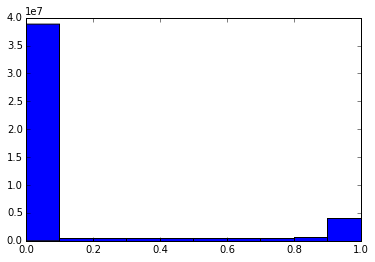

In [53]:
##What does the distribution of grayscale values look like?
train_data_For_Hist = np.reshape(train_data,len(train_data)*len(train_data[1]))
fig = plt.hist(train_data_For_Hist, 10)

In [189]:
#def P7():

#Let's set it so that any pixel value greater than a variable is set to 1. 
Binary_1_Cutoff = .1
Total_Entries = len(train_data)
Entry_Size = len(train_data[1])

train_data_binary = np.empty([Total_Entries,Entry_Size])
for i in range(0,Total_Entries):
    for j in range(0,Entry_Size):
        if train_data[i][j] >= Binary_1_Cutoff:
            train_data_binary[i][j] = 1
        else:
            train_data_binary[i][j] = 0

  
            
dev_data_binary = np.empty([len(dev_data),Entry_Size])
for i in range(0,len(dev_data)):
    for j in range(0,Entry_Size):
        if dev_data[i][j] >= Binary_1_Cutoff:
            dev_data_binary[i][j] = 1
        else:
            dev_data_binary[i][j] = 0  
            

            
Grey_Cutoff = Binary_1_Cutoff
Black_Cutoff = .9

train_data_multiclass = np.empty([Total_Entries,Entry_Size])
for i in range(0,Total_Entries):
    for j in range(0,Entry_Size):
        if train_data[i][j] >= Grey_Cutoff and train_data[i][j] < Black_Cutoff:
            train_data_multiclass[i][j] = 1
        elif train_data[i][j] >= Black_Cutoff:
            train_data_multiclass[i][j] = 2
        else:
            train_data_multiclass[i][j] = 0

        
dev_data_multiclass = np.empty([len(dev_data),Entry_Size])
for i in range(0,len(dev_data)):
    for j in range(0,Entry_Size):
        if dev_data[i][j] >= Grey_Cutoff and dev_data[i][j] < Black_Cutoff:
            dev_data_multiclass[i][j] = 1
        elif dev_data[i][j] >= Black_Cutoff:
            dev_data_multiclass[i][j] = 2
        else:
            dev_data_multiclass[i][j] = 0  

In [192]:
#Fit Model and get predictions
#WHY DOES THIS ONLY WORK WITH alpha >0?? alpha = 0 is no smoothing. 
Bern_NB = BernoulliNB(alpha = 1, binarize = None, fit_prior = False)       
        
Bern_NB.fit(train_data_binary,train_labels)

Predictions_Bern_NB = Bern_NB.predict(dev_data_binary)

#Determine Accuracy
Num_Incorrect_Bern_NB = 0
for i in range(0,len(dev_labels)):
    if dev_labels[i] != Predictions_Bern_NB[i]:
        Num_Incorrect_Bern_NB += 1
        

Accuracy_Bern_NB = 1-(np.true_divide(Num_Incorrect_Bern_NB,len(dev_labels)))
print "BernoulliNB accuracy =", Accuracy_Bern_NB

 

       
        

Multi_NB = MultinomialNB(alpha = 1, fit_prior = False)       
        
Multi_NB.fit(train_data_binary,train_labels)

Predictions_Multi_NB = Multi_NB.predict(dev_data_binary)


#Determine Accuracy
Num_Incorrect_Multi_NB = 0
for i in range(0,len(dev_labels)):
    if dev_labels[i] != Predictions_Multi_NB[i]:
        Num_Incorrect_Multi_NB += 1
        
Accuracy_Multi_NB = 1-(np.true_divide(Num_Incorrect_Multi_NB,len(dev_labels)))

print "MultinomialNB accuracy =", Accuracy_Multi_NB        
        
        
print Multi_NB.predict_proba(dev_data_binary)
print Bern_NB.predict_proba(dev_data_binary)
### STUDENT END ###

#P7()

BernoulliNB accuracy = 0.834
MultinomialNB accuracy = 0.814
[[  7.89039376e-037   7.13941879e-048   1.78129824e-025 ...,
    2.17778280e-015   6.15196061e-011   6.21258886e-002]
 [  5.10975208e-033   1.23109348e-071   8.50739198e-021 ...,
    3.38291804e-057   6.88379934e-029   2.37108840e-055]
 [  7.10177034e-037   5.80470026e-060   5.86065931e-019 ...,
    5.24423981e-053   4.07051051e-028   9.38036008e-036]
 ..., 
 [  1.00000000e+000   8.77583786e-157   2.07248816e-040 ...,
    1.77474147e-093   1.02237030e-054   7.86424552e-084]
 [  3.82762990e-042   1.00000000e+000   1.68081315e-017 ...,
    6.02797231e-052   5.77529864e-014   2.47891941e-042]
 [  1.00000000e+000   2.22014394e-201   8.99662299e-060 ...,
    2.84030513e-119   2.92857233e-059   2.93683483e-111]]
[[  1.48515142e-079   6.61228184e-070   2.47266786e-047 ...,
    4.33459129e-024   1.83022739e-033   2.39190603e-006]
 [  3.34751617e-050   3.30041087e-116   1.06641496e-038 ...,
    1.21501853e-081   9.58791448e-041   1.647

ANSWER: The predictions using a multi-class model got worse. I am not entirely sure why. I could use some help here. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
#def P8(alphas):

### STUDENT START ###

# test the model for alpha = 0.1, 0.2, ..., 1.0
#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
print alphas
clf = GridSearchCV(BernoulliNB(), alphas, cv=10)
#Output_CV = clf.fit(train_data_binary,train_labels) # running the grid search
clf.fit(train_data_binary,train_labels)
print clf.grid_scores_
print clf.best_estimator_ 
print clf.best_params_ 
print clf.best_score_  
#print Output_CV.grid_scores_ 
### STUDENT END ###

#
#nb = P8(alphas)

{'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
[mean: 0.83588, std: 0.00313, params: {'alpha': 0.0001}, mean: 0.83583, std: 0.00316, params: {'alpha': 0.001}, mean: 0.83570, std: 0.00328, params: {'alpha': 0.01}, mean: 0.83538, std: 0.00318, params: {'alpha': 0.1}, mean: 0.83512, std: 0.00312, params: {'alpha': 0.5}, mean: 0.83483, std: 0.00301, params: {'alpha': 1.0}, mean: 0.83443, std: 0.00289, params: {'alpha': 2.0}, mean: 0.83175, std: 0.00286, params: {'alpha': 10.0}]
BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
{'alpha': 0.0001}
0.835883333333


ANSWER: The best value for alpha was .0001. The model did not run at an alpha of zero. I received a error "RuntimeWarning: divide by zero encountered in log." It was my understanging that an alpha of zero was no smoothing, so I'm not sure why I received this error. 

I am not surprised that an alpha of .0001 had the best results. I would not expect to see many instances of anomalous pixels between the training and dev set. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [74]:
Gauss_NB = GaussianNB() 

def Transform_Function(Array):
    return (Array+10)**-.01

Gauss_NB.fit(Transform_Function(train_data),train_labels)
Accuracy = Gauss_NB.score(Transform_Function(dev_data),dev_labels)
print "Accuracy = ", Accuracy

Accuracy =  0.78


ANSWER: This model was not performing as well as the Bernoulli naive Bayes model because a Gaussian naive bayes model expects the input data to be normally distributed. The input data in this case is not normally distributed. I applied a tranformation on the training data in order to make it more normally distributed. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

(10L, 784L)
k =  0
i =  0
counter =  0
k =  1
i =  0
counter =  1
k =  2
i =  0
counter =  2
k =  3
i =  0
counter =  3
k =  4
i =  0
counter =  4
k =  5
i =  0
counter =  5
k =  6
i =  0
counter =  6
k =  7
i =  0
counter =  7
k =  8
i =  0
counter =  8
k =  9
i =  0
counter =  9
k =  10
i =  0
counter =  10
k =  11
i =  0
counter =  11
k =  12
i =  0
counter =  12
k =  13
i =  0
counter =  13
k =  14
i =  0
counter =  14
k =  15
i =  0
counter =  15
k =  16
i =  0
counter =  16
k =  17
i =  0
counter =  17
k =  18
i =  0
counter =  18
k =  19
i =  0
counter =  19
k =  0
i =  1
counter =  20
k =  1
i =  1
counter =  21
k =  2
i =  1
counter =  22
k =  3
i =  1
counter =  23
k =  4
i =  1
counter =  24
k =  5
i =  1
counter =  25
k =  6
i =  1
counter =  26
k =  7
i =  1
counter =  27
k =  8
i =  1
counter =  28
k =  9
i =  1
counter =  29
k =  10
i =  1
counter =  30
k =  11
i =  1
counter =  31
k =  12
i =  1
counter =  32
k =  13
i =  1
counter =  33
k =  14
i =  1
counter =  34
k =

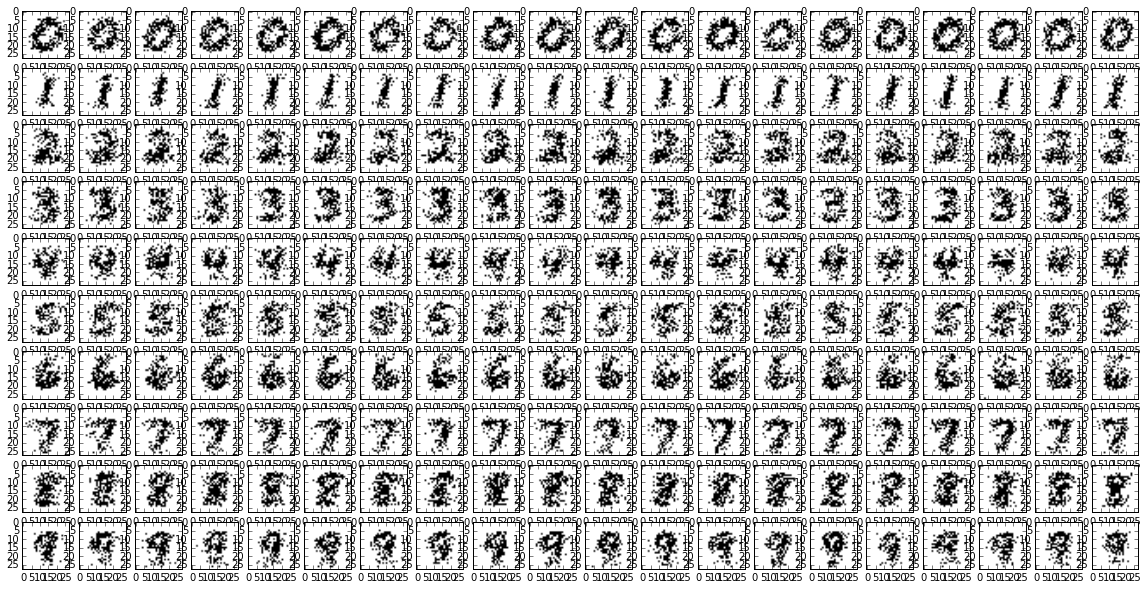

In [105]:
#def P10(num_examples):

### STUDENT START ###
Bern_NB = BernoulliNB(alpha = 1, binarize = None, fit_prior = False)       
        
Bern_NB.fit(train_data_binary,train_labels)

Predictions_Bern_NB = Bern_NB.predict(dev_data_binary)


print Bern_NB.feature_log_prob_.shape

random_number_array = np.empty([20*10,Entry_Size])
counter = 0
for i in range(0,10):
    for k in range (0,20):
        for j in range(0,Entry_Size):
            if np.random.rand() <= np.exp(Bern_NB.feature_log_prob_[i][j]):
                random_number_array[counter][j] = 1
            else:
                random_number_array[counter][j] = 0
        counter = counter + 1

# reshape the data into 28x28 matrixes for each value in array X
random_number_matrixes = []
for i in range(0,len(random_number_array)):
    A = np.array(random_number_array[i])
    A_reshaped = np.reshape(A,(28,28))
    random_number_matrixes.append(A_reshaped)
    
            
#print(random_number_matrixes[0])    

fig, axes = plt.subplots(nrows=10, ncols=20, figsize = (20,10))

for j in range(0,len(axes.flat)):
    Current_Plot = axes.flat[j]
    Digit_Img_Source_Data = random_number_matrixes[j] 
    imgplot = Current_Plot.imshow(Digit_Img_Source_Data, cmap = 'Greys', vmin=0, vmax=1, aspect = 'auto')


plt.show()    
    
### STUDENT END ###

#P10(20)

ANSWER: This plot perfectly shows the "naive" nature of a naive bayes model. These look different from the originals because the naive bayed model assumes the probability of two pixels right next to each other being black are independent of one another. In reality they are very much dependent on one another. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [169]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
Bern_NB = BernoulliNB(alpha = 1, binarize = 0.1, fit_prior = False)       
        
Bern_NB.fit(train_data,train_labels)

Predictions_Bern_NB = Bern_NB.predict(dev_data)

Prediction_Probs = Bern_NB.predict_proba(dev_data)

print "Overall Accuracy = ", Bern_NB.score(dev_data,dev_labels)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
Bucketized_Correct = [0]*len(buckets)
Bucketized_Total= [0]*len(buckets)


for i in range(0,len(dev_data)):
    Current_Prediction = Predictions_Bern_NB[i]
    Current_Label = dev_labels[i] 
    
    #check if label is correct    
    if Current_Prediction == Current_Label:
        Correct = 1
    else: Correct = 0
        
    Current_Probability = max(Prediction_Probs[i])
    #find the bucket the given probability falls into and store the counts in the Bucketized_Correct and Bucketized_Total arrays.
    for b in range(0,len(buckets)):
        if Current_Probability < buckets[b]:
            Bucketized_Total[b] = Bucketized_Total[b]+1
            Bucketized_Correct[b] = Bucketized_Correct[b]+Correct
            break
            
print np.divide(np.array(Bucketized_Correct,dtype=np.float),np.array(Bucketized_Total,dtype=np.float))
### STUDENT END ###


C:\Users\marks\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\naive_bayes.py:534: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\marks\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:36: RuntimeWarning: invalid value encountered in divide


Overall Accuracy =  0.099
[ nan  nan  nan  nan  nan  nan  nan  nan  nan]


ANSWER: I would characterize this calibration as weak. There is certainly a correlation between the posterior probability and the accuracy, but the posterior probability is not roughly equal to the accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()